# BFS Breadth First Search

Реализовать поиск в ширину (BFS) в графе. Структуру представления графа можно выбрать любой. Для реализации может пригодиться структура данных queue/dequeue. (2 балла)

In [337]:
def BFS(graph_matrix, start, end, visited=None, is_start=True):
    """
        Логика такая - пробегаем по всем соседним вершинам текущей вершины, обновляя веса,
        посещенная вершина помечается и передается далее, чтобы не было петель.

        В данной реализации происходит "обратное" разворачивание - сначала идем до конца и собираем путь.
    """
    # контейнер путей
    pathes = []
    
    # контейнер весов
    weights = []

    # при первом заходе посещена только самая первая вершина
    if visited is None:
        visited = [start]
    else:
        # если это не конечная точка - добавим ее в посещенные
        if start != end:
            visited.append(start)
    for i in range(0, len(graph_matrix[start])):
        # идем только по ранее не посещенным
        if graph_matrix[start][i] != 0 and i not in visited: # and start != end:
            if start == end:
                continue
            # идем далее
            _vis = visited + [start]
            _pathes, _weights = BFS(graph_matrix, i, end, _vis, False)
            # print( _pathes, _weights, start)
            # получаем пути и добавляем текущую першину
            if _pathes is not None:
                for _path, _weight in zip(_pathes, _weights):
                    pathes.append([start] + _path)
                    weights.append(_weight + graph_matrix[start][i])
                    # print(pathes, weights)


    # если не первый заход
    if not is_start:
        if start == end:
                return [[end]], [0]
        else:
            return pathes, weights

    # собираем все пути и веса
    output = [[_path, _w] for (_path, _w) in zip(pathes, weights)]
    # сортируем по убыванию
    output.sort(key=lambda x: x[-1])
    print(output)
    # берем путь с наименьшим весом
    min_weight = output[0][-1]
    min_num = len(output[0][0])
    min_route = output[0]
    # если несколько путей с одинаковым весом, берем тот 
    # у которого количество граней минимально
    for i in range(len(output)):
        if output[i][-1]>min_weight:
            break
        else:
            if len(output[i][0]) < min_num:
                min_num = len(output[i][0])
                min_route = output[i]
            
    return min_route
            

In [338]:
matrix = [[0, 1, 2, 3, 0, 0, 0, 0],
          [1, 0, 0, 0, 1, 0, 0, 0],
          [2, 0, 0, 3, 0, 3, 0, 0],
          [3, 0, 3, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 1, 0],
          [0, 0, 3, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0, 1, 1, 0]]
    
BFS(matrix, 0, 5)

[[[0, 1, 4, 6, 7, 5], 5], [[0, 2, 5], 5], [[0, 3, 2, 5], 9]]


[[0, 2, 5], 5]

In [339]:
def check_results(res1: 'list[list[int], int]', res2: 'list[list[int], int]') -> bool:
    if len(res1[0]) != len(res2[0]):
        return False
    if res1[1] != res2[1]:
        return False
    for i in range(len(res1[0])):
        if res1[0][i] != res2[0][i]:
            return False
    return True

def test1(func)-> None:
    matrix = [[0, 1, 0], 
              [1, 0, 2], 
              [0, 2, 0]]
    
    result = func(matrix, 0, 2)
    try:
        assert check_results([[0, 1, 2], 3], result)
        print('Test passed')
    except Exception:
        print('Test not passed')


def test2(func) -> None:
    matrix = [[0, 1, 1, 2, 5, 1, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 3, 6],
              [1, 0, 0, 0, 0, 7, 0, 0],
              [1, 0, 0, 0, 7, 0, 0, 0],
              [0, 0, 0, 3, 0, 0, 0, 2],
              [0, 0, 0, 6, 0, 0, 2, 0]]
    
    result = func(matrix, 0, 7)
    try:
        assert check_results([[0, 3, 6, 7], 7], result)
        print('Test passed')
    except Exception:
        print('Test not passed')


def test3(func) -> None:
    matrix = [[0, 1, 2, 3, 0, 0, 0, 0],
              [1, 0, 0, 0, 1, 0, 0, 0],
              [2, 0, 0, 3, 0, 3, 0, 0],
              [3, 0, 3, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0],
              [0, 0, 3, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 1, 0]]
    
    result = func(matrix, 0, 5)
    try:
        assert check_results([[0, 2, 5], 5], result)
        print('Test passed')
    except Exception:
        print('Test not passed')

In [340]:
test1(BFS)
test2(BFS)
test3(BFS)

[[[0, 1, 2], 3]]
Test passed
[[[0, 3, 6, 7], 7], [[0, 3, 7], 8]]
Test passed
[[[0, 1, 4, 6, 7, 5], 5], [[0, 2, 5], 5], [[0, 3, 2, 5], 9]]
Test passed


# DFS Depth First Search

Построить блок-схему для поиска в графе в глубину(DFS) (2 балла)

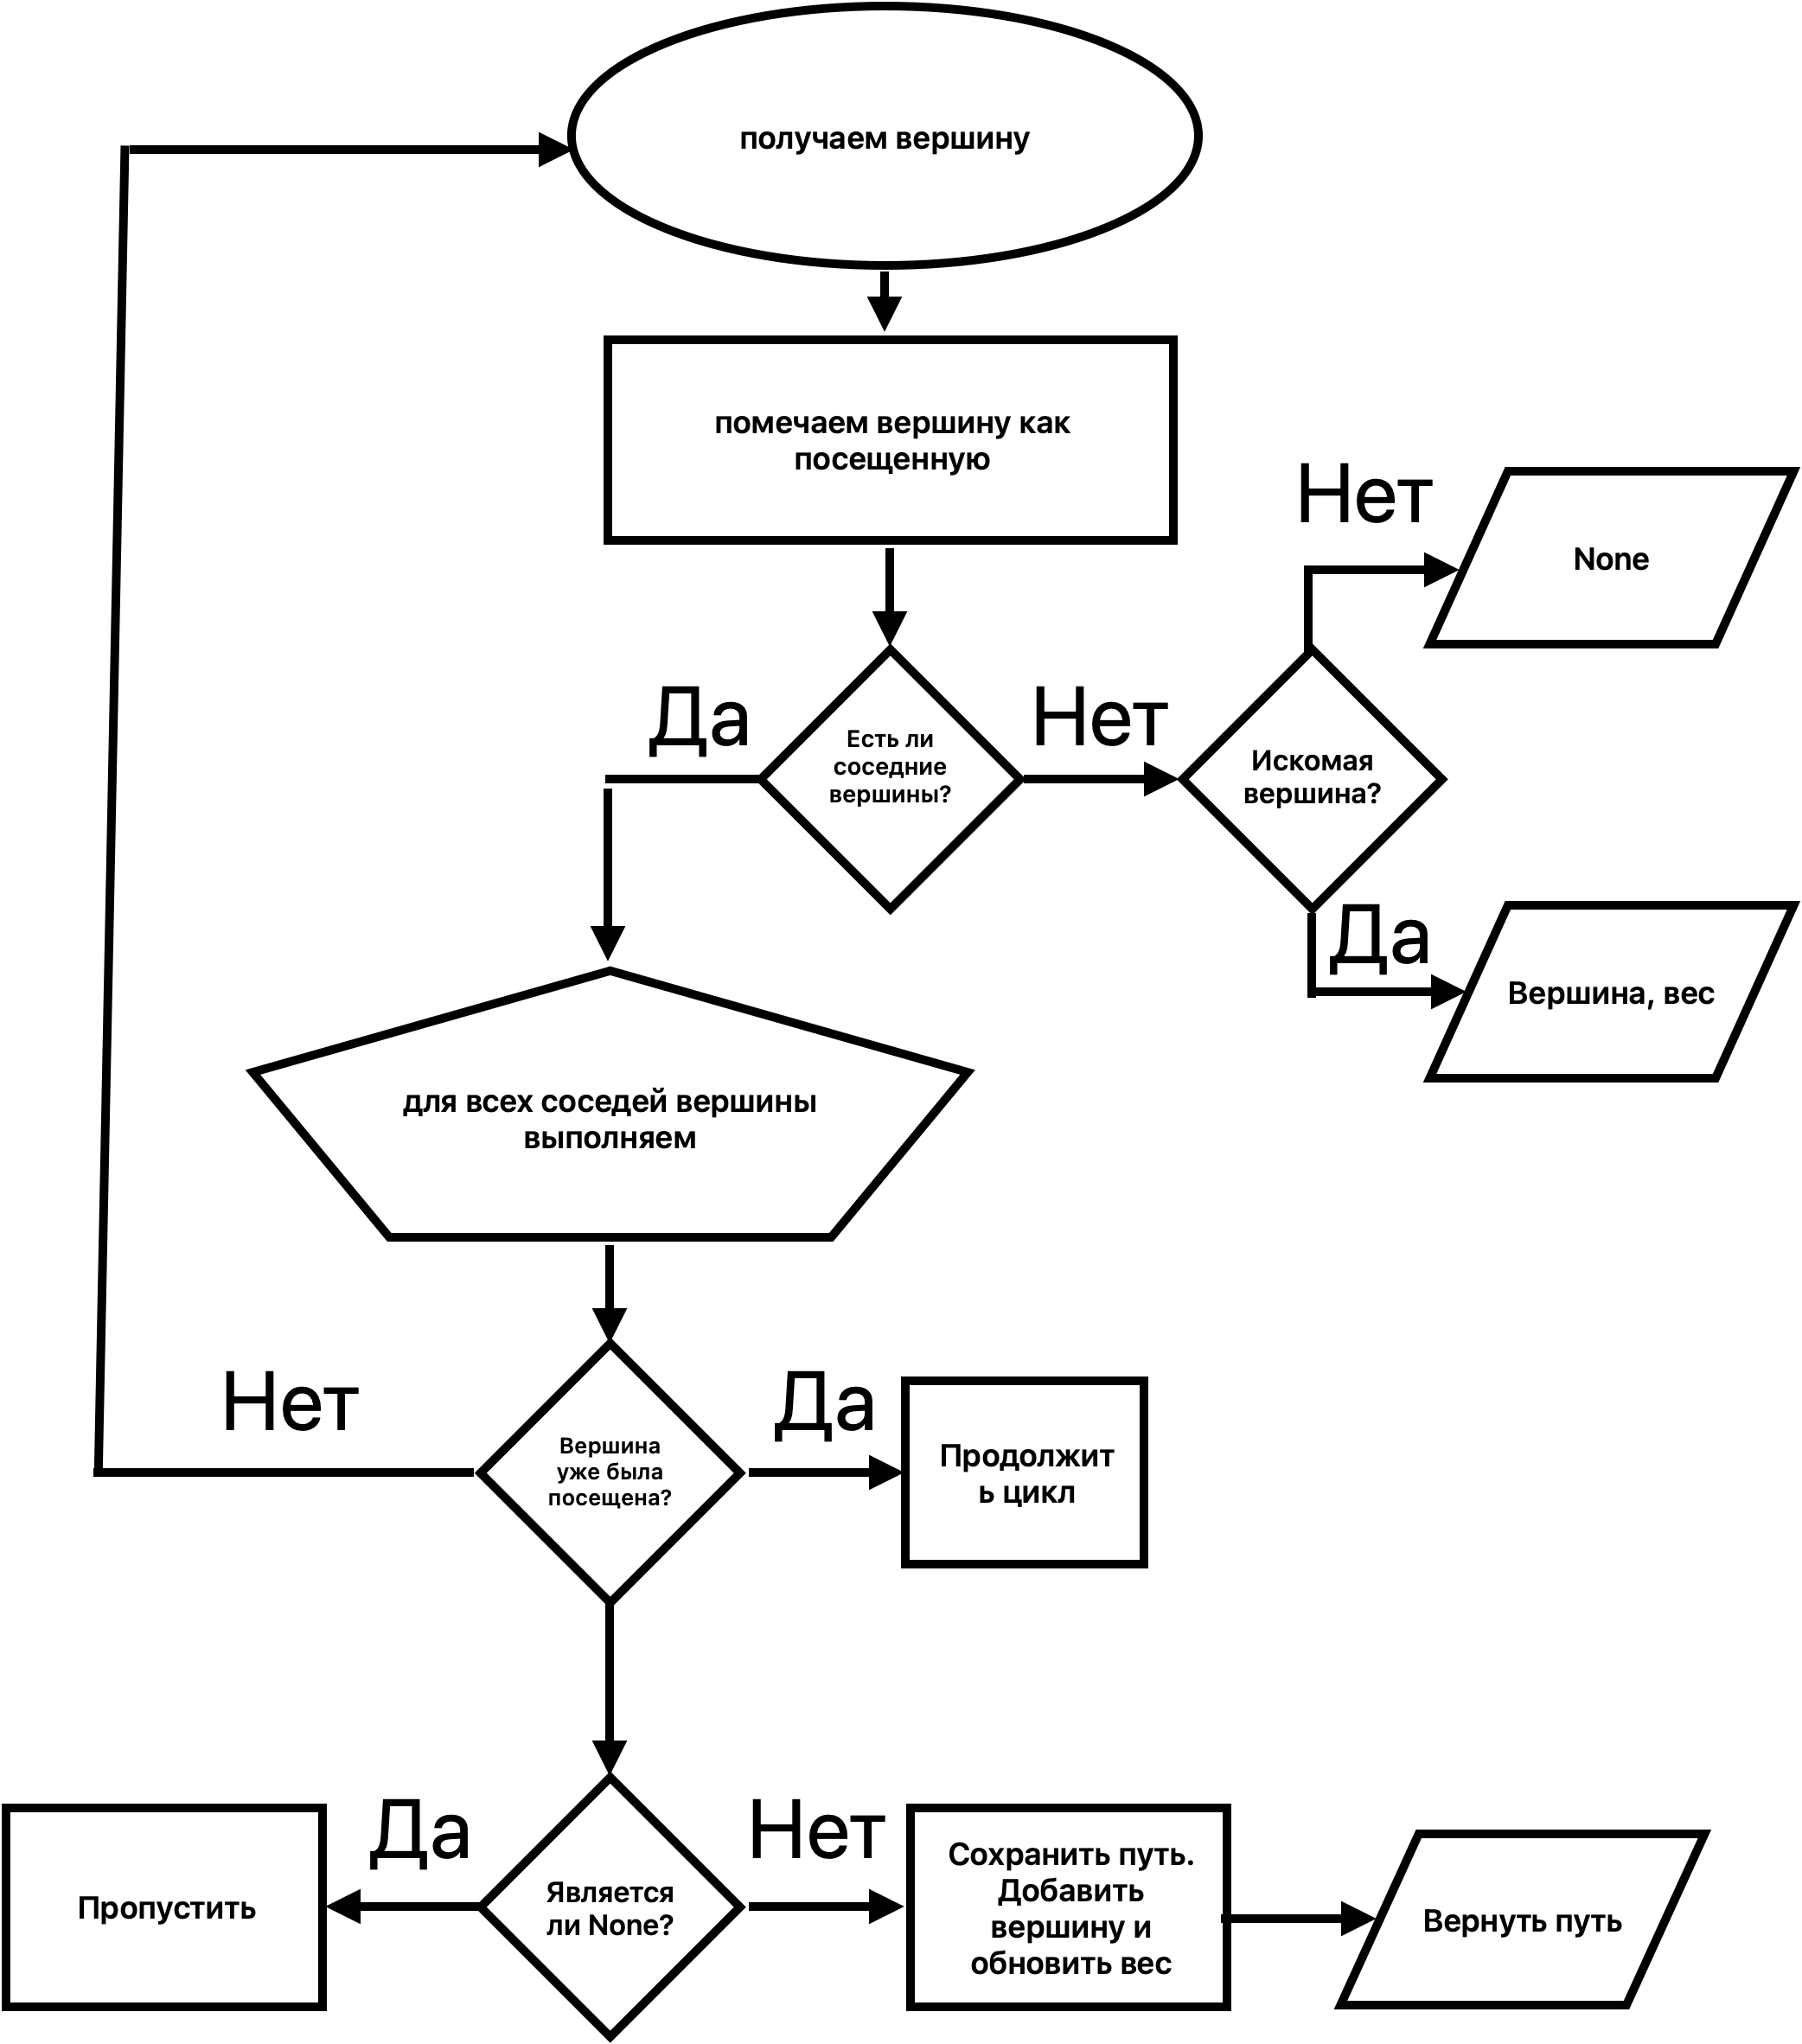

In [342]:
def DFS(matrix, start, end, visited=None, is_start=True, print_all=False):
    pathes = []
    weights = []
    if visited is None:
        visited = []
    vertexes = [i for i in range(len(matrix[start])) if ((matrix[start][i] != 0) and (i not in visited))]
    
    # Ecть ли соседи
    if len(vertexes) > 0:
        # по всем соседним вершинам
        for vert in vertexes:
            if vert not in visited:
                if vert == end:
                    pathes.append([start, end])
                    weights.append(matrix[start][vert])
                elif vert != end:
                    _vis = visited + [start]
                    _pathes, _weights = DFS(matrix, vert, end, _vis , is_start=False)
                    if len(_pathes) != 0:
                        for _path, _w in zip(_pathes, _weights):
                            pathes.append([start]+_path)
                            weights.append(matrix[start][vert] + _w)
    if is_start:
        output = [[_path, _w] for (_path, _w) in zip(pathes, weights)]
        output.sort(key=lambda x: x[-1])
        if print_all:
            print('Pathes found:\t', output)
        min_path = output[0]
        for i in range(len(output)):
            if output[i][-1]>min_path[-1]:
                break
            if len(output[i][0]) < len(min_path[0]):
                min_path = output[i]
        # return pathes, weights
        return min_path
        
    else:
        return pathes, weights

In [343]:
matrix = [[0, 1, 2, 3, 0, 0, 0, 0],
          [1, 0, 0, 0, 1, 0, 0, 0],
          [2, 0, 0, 3, 0, 3, 0, 0],
          [3, 0, 3, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 1, 0],
          [0, 0, 3, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 1, 0, 0, 1],
          [0, 0, 0, 0, 0, 1, 1, 0]]
    
DFS(matrix, 0, 5, print_all=True)

Pathes found:	 [[[0, 1, 4, 6, 7, 5], 5], [[0, 2, 5], 5], [[0, 3, 2, 5], 9]]


[[0, 2, 5], 5]

In [344]:
test1(DFS)
test2(DFS)
test3(DFS)

Test passed
Test passed
Test passed


# Граф G(V, E) задан в виде [0:{}, 1:{i, j, ...}, ..., n:{k, l, ...}]. Построить графики времени обхода соседей для каждой вершины в зависимости от количества вершин и ребер. Требуется показать, что асимптотическая сложность -- O(V+E) (3 балла)

In [ ]:
# просто бесполезно пройтись по графу и посчитать время обхода всех соседей

# двудольность графа

Во время контрольной работы профессор Шнурников заметил, что некоторые студенты обмениваются записками. Сначала он хотел поставить им всем двойки, но в тот день профессор был добрым, а потому решил разделить студентов на две группы: списывающих и дающих списывать, и поставить двойки только первым. У профессора записаны все пары студентов, обменявшихся записками. Требуется определить, сможет ли он разделить студентов на две группы так, чтобы любой обмен записками осуществлялся от студента одной группы студенту другой группы. (Возможное решение -- показать двудольность графа) (2 балла)